In [1]:
import tensorflow as tf
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, Reshape
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Embedding
from keras.layers import Activation
from keras.layers import Concatenate
from keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import zeros
from numpy import ones
from numpy import expand_dims
from numpy.random import randn
from numpy.random import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Load dataset and insert column names, remove the semicolon
#Data preprocessing

column_names= ["user_id", "activity", "timestamp", "axis_x", "axis_y", "axis_z"]
data = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/WISDM/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt', header=None, names=column_names, comment=";", error_bad_lines=False)

C:\Users\procns\AppData\Local\Temp\ipykernel_4140\608240631.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/WISDM/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt', header=None, names=column_names, comment=";", error_bad_lines=False)
Skipping line 832904: expected 6 fields, saw 7
Skipping line 832905: expected 6 fields, saw 7
Skipping line 832906: expected 6 fields, saw 7
Skipping line 832907: expected 6 fields, saw 7
Skipping line 832908: expected 6 fields, saw 7
Skipping line 832909: expected 6 fields, saw 7
Skipping line 832910: expected 6 fields, saw 7
Skipping line 832911: expected 6 fields, saw 7
Skipping line 832912: expected 6 fields, saw 7
Skipping line 832913: expected 6 fields, saw 7
Skipping line 832914: expected 6 fields, saw 7
Skipping line 832915: expected 6 fields, saw 7
Skipping line 832916: expected 6 fields, saw 7
Skipping line 83

In [3]:
data = data.dropna()

In [4]:
print('Total rows : ', len(data))
data.head()

Total rows :  1086471


,user_id,activity,timestamp,axis_x,axis_y,axis_z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [5]:
data17 = data[data['user_id'] == 17]

In [6]:
data17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22020 entries, 8489 to 907917
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    22020 non-null  int64  
 1   activity   22020 non-null  object 
 2   timestamp  22020 non-null  int64  
 3   axis_x     22020 non-null  float64
 4   axis_y     22020 non-null  float64
 5   axis_z     22020 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.2+ MB


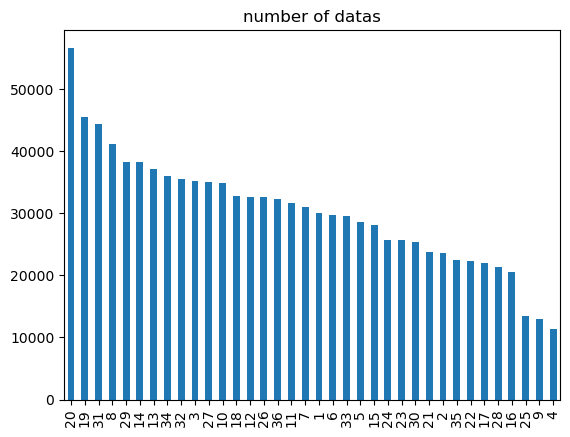

In [7]:
data['user_id'].value_counts().plot(kind='bar', title='number of datas');

<Axes: xlabel='activity', ylabel='count'>

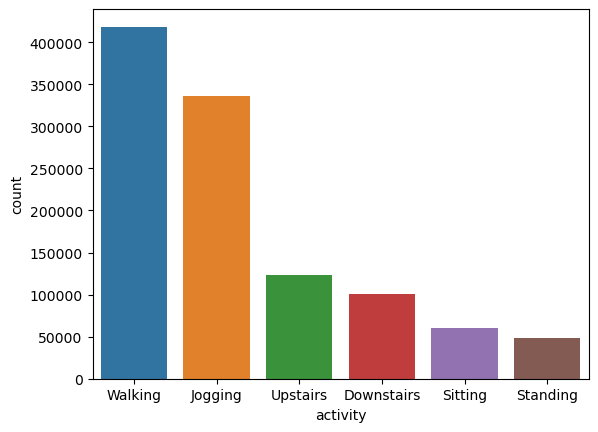

In [8]:
sns.countplot(x = "activity", data = data, order = data.activity.value_counts().index)

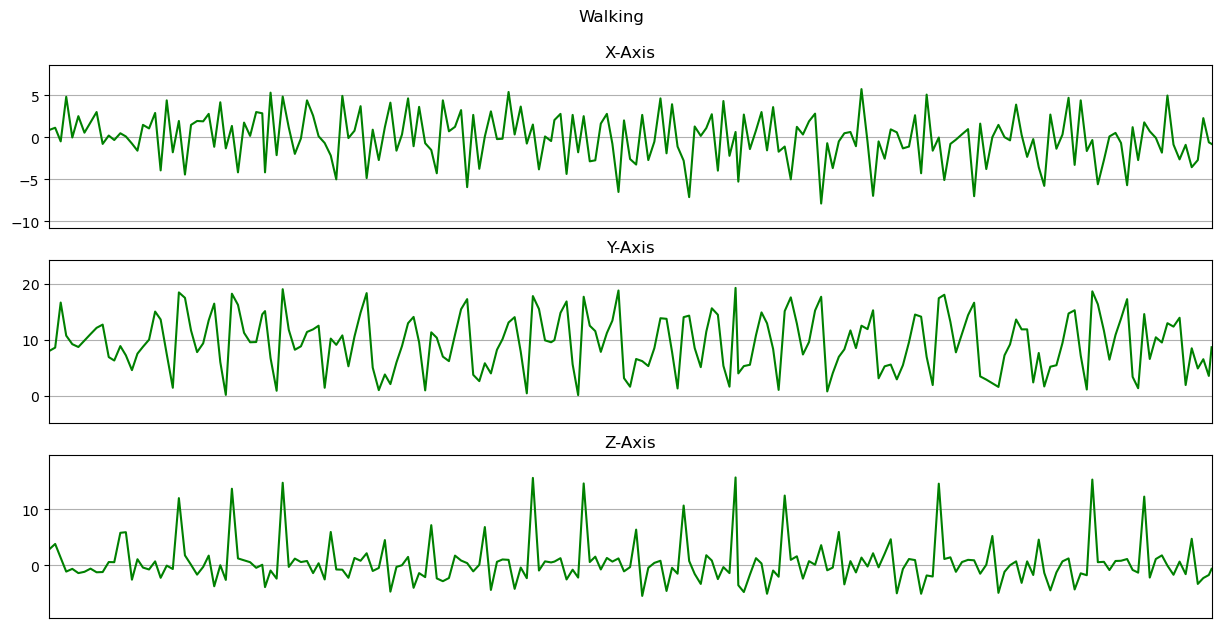

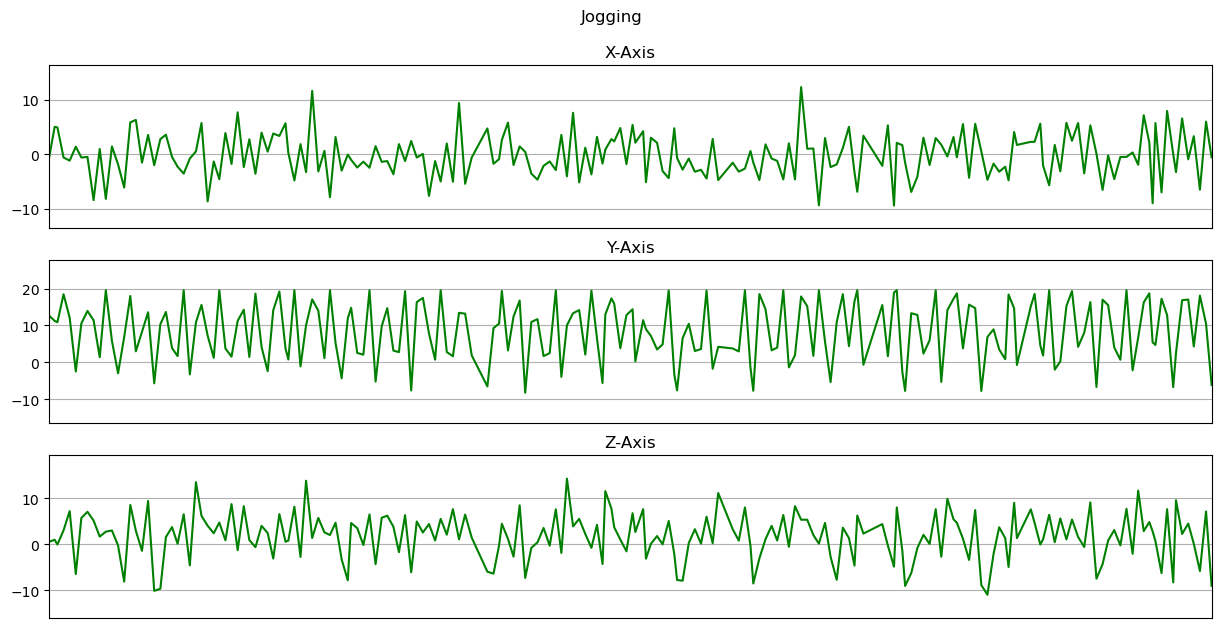

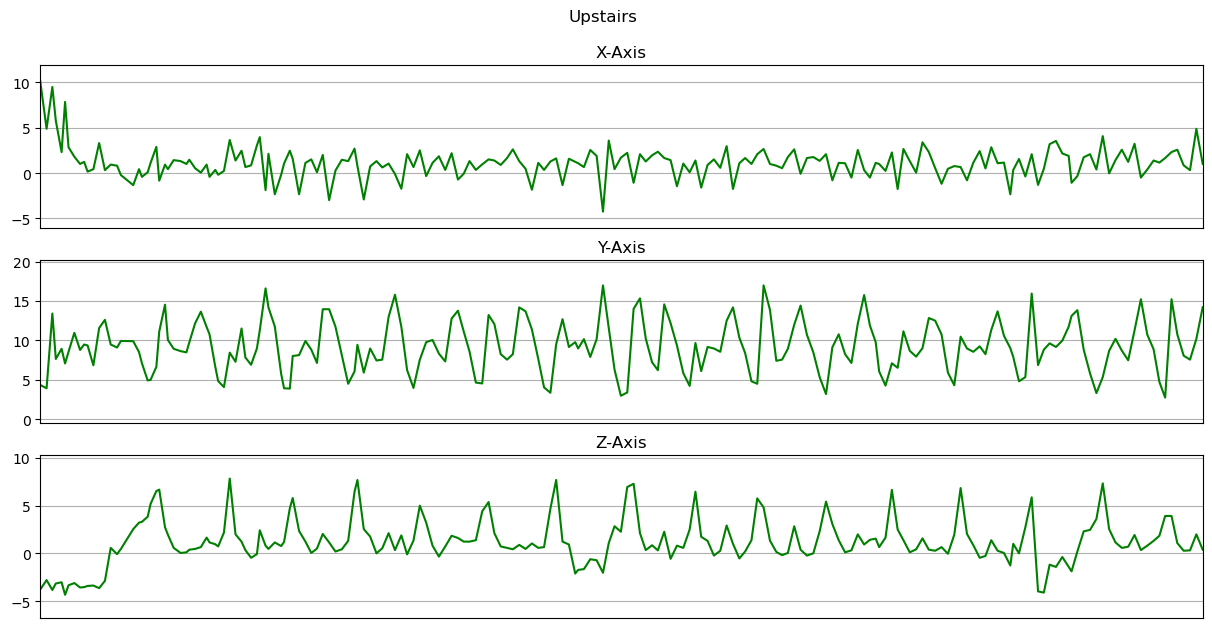

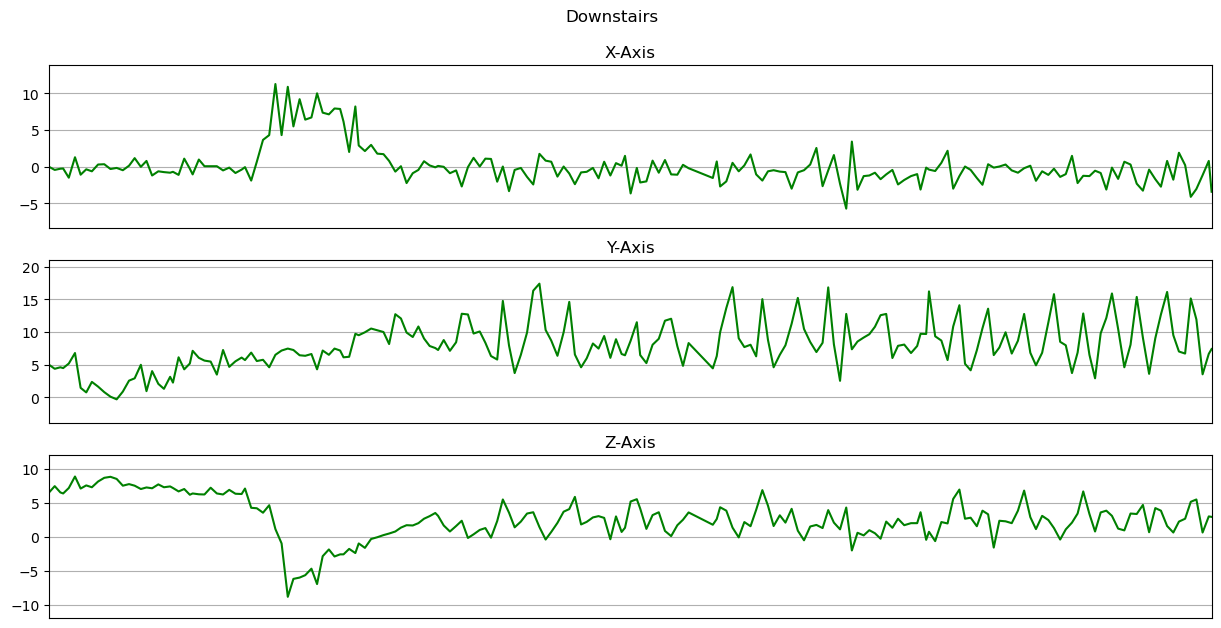

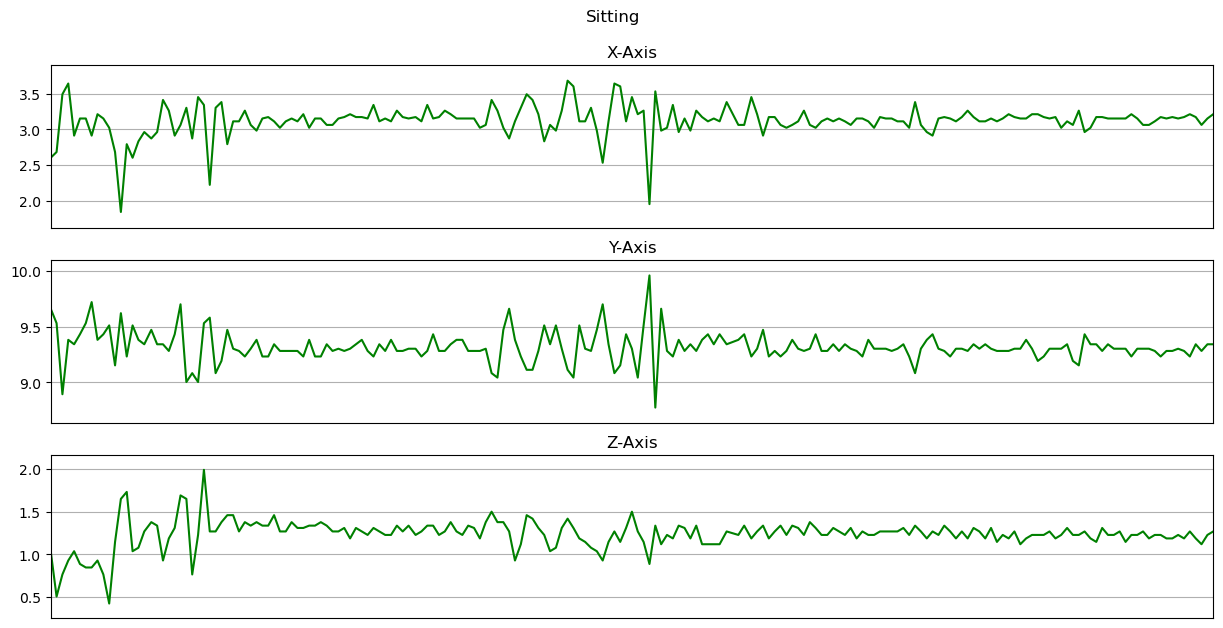

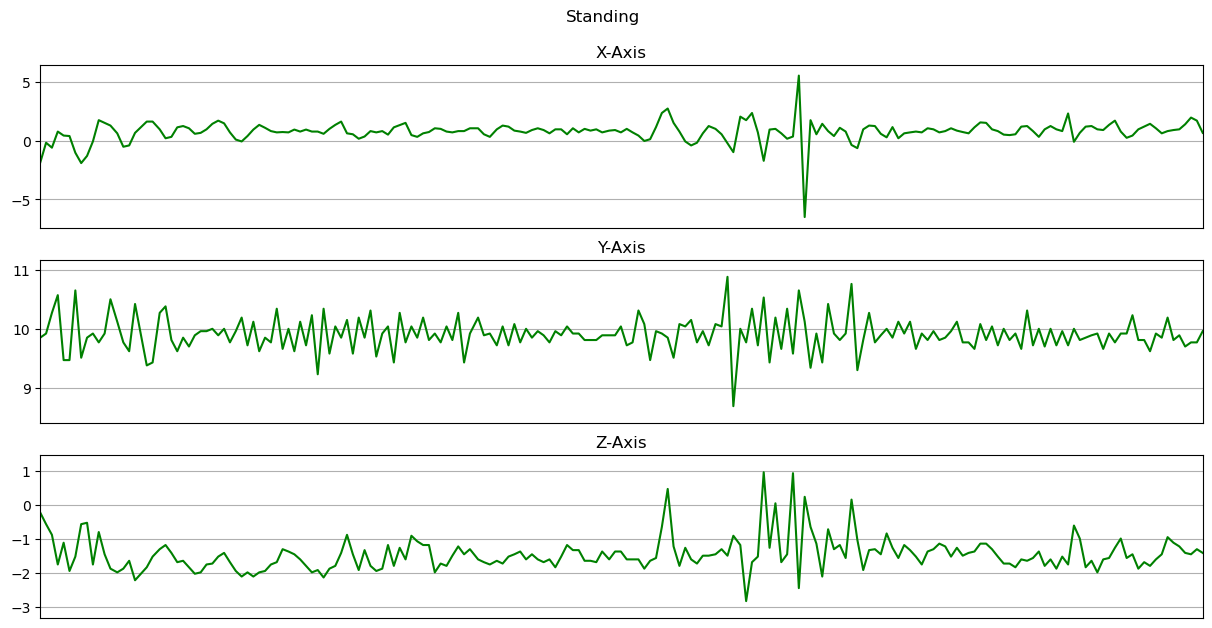

In [9]:
activities = data['activity'].value_counts().index
activities

def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['timestamp'], data['axis_x'], 'X-Axis')
    plot_axis(ax1, data['timestamp'], data['axis_y'], 'Y-Axis')
    plot_axis(ax2, data['timestamp'], data['axis_z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

Fs = 20
for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [10]:
data = data.drop('user_id', axis = 1)

In [11]:
data.head()

,activity,timestamp,axis_x,axis_y,axis_z
0,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,Jogging,49106062271000,5.012288,11.264028,0.953424
2,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [12]:
 # Define column name of the label vector
LABEL = "ActivityEncoded"
# Transform the labels from String to Integer via LabelEncoder
le = LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
data[LABEL] = le.fit_transform(data["activity"].values.ravel())
data = data.drop('activity', axis = 1)
data.head()

,timestamp,axis_x,axis_y,axis_z,ActivityEncoded
0,49105962326000,-0.694638,12.680544,0.503953,1
1,49106062271000,5.012288,11.264028,0.953424,1
2,49106112167000,4.903325,10.882658,-0.081722,1
3,49106222305000,-0.612916,18.496431,3.023717,1
4,49106332290000,-1.184970,12.108489,7.205164,1


# GAN

## Define Generator and Discriminator

In [13]:
# define the standalone discriminator model
def define_discriminator(in_shape=(384,1), n_classes=6):
    # weight initialization
    #init = RandomNormal(stddev=0.02)
    
    # image input
    in_image = Input(shape=in_shape)
    
    # downsample to 14x14
    fe = Conv1D(16, 3, strides=2, padding='same')(in_image)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Dropout(0.2)(fe)
    
    # normal
    fe = Conv1D(32, 3, strides=2, padding='same')(fe)
    fe = BatchNormalization()(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Dropout(0.2)(fe)
    
    # downsample to 7x7
    fe = Conv1D(64, 3, strides=2, padding='same')(fe)
    fe = BatchNormalization()(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Dropout(0.2)(fe)
    
    #downsample one more
    fe = Conv1D(128, 3, strides=2, padding='same')(fe)
    fe = BatchNormalization()(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Dropout(0.2)(fe)
   
    # flatten feature maps
    fe = Flatten()(fe)
    
    # real/fake output
    out1 = Dense(1, activation='sigmoid')(fe)
    
    # class label output
    out2 = Dense(n_classes, activation='softmax')(fe)
    
    # define model
    model = Model(in_image, [out1, out2])
    
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    
    # binary for real/fake loss; categorical for class label loss
    model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer=opt)
    model.summary()
    return model

# define the standalone generator model
def define_generator(latent_dim, n_classes=4):
    # weight initialization
    #init = RandomNormal(stddev=0.02)
    depth = 32 
    ks = 3
    dropout = 0.25
    dim = 96 
    
    # label input
    in_label = Input(shape=(1,))
    
    # embedding for categorical input
    li = Embedding(n_classes, 50)(in_label)
    
    # linear multiplication
    n_nodes = 96 * 1
    li = Dense(n_nodes)(li)
    
    # reshape to additional channel
    li = Reshape((96, 1, 1))(li)
    
    # image generator input
    in_lat = Input(shape=(latent_dim,))
    
    # foundation for 7x7 image
    n_nodes = dim*depth
    gen = Dense(n_nodes)(in_lat)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Reshape((dim, 1, depth))(gen)
    
    # merge image gen and label input
    merge = Concatenate()([gen, li]) #gen=96,1,32 x li=96,1,1
    
    # upsample to 192,1,16
    gen = Conv2DTranspose(16, 3, strides=(2,1), padding='same')(merge)
    gen = BatchNormalization()(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    
    #upsample to  384,1,8
    gen = Conv2DTranspose(8, 3, strides=(2,1), padding='same')(gen)
    gen = BatchNormalization()(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    
    #updamsple
    #gen = Conv2DTranspose(48, (3,3), strides=(2,1), padding='same', kernel_initializer=init)(gen)
    #gen = BatchNormalization()(gen)
    #gen = Activation('relu')(gen)
    #384 x 1 property image
    gen = Reshape((384,-1))(gen)
    # upsample to 28x28
    #gen = Conv1DTranspose(1, 3, padding='same', kernel_initializer=init)(gen)
    gen = Conv1D(1, 5, strides=1, padding='same')(gen)
    
    out_layer = Activation('tanh')(gen)
    
    # define model
    model = Model([in_lat, in_label], out_layer)
    model.summary()
    return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    
    # connect the outputs of the generator to the inputs of the discriminator
    gan_output = d_model(g_model.output)
    
    # define gan model as taking noise and label and outputting real/fake and label outputs
    model = Model(g_model.input, gan_output)
    
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer=opt)
    return model

## Define Real Samples from Real Data

In [14]:
# load images
def load_real_samples():
    # load dataset
    data = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/WISDM/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt',
                       header=None, names=column_names, comment=";", error_bad_lines=False)
    data = data[data['user_id'] == 17]
    data = data.drop('user_id', axis = 1)
    
    # Define column name of the label vector
    LABEL = "ActivityEncoded"
    # Transform the labels from String to Integer via LabelEncoder
    le = LabelEncoder()
    # Add a new column to the existing DataFrame with the encoded values
    data[LABEL] = le.fit_transform(data["activity"].values.ravel())
    data = data.drop('activity', axis = 1)
    
    # get only timeseries data values + class labels
    dataset=data.values
    dataset = dataset.astype('float64')
    dataxy=dataset[:,1:]
    # dataxy는 dataset에서 timestamp 제외 데이터 
    
    # make new array contains of value from first column
    timep=np.zeros([len(dataset),])
    timep=dataset[:,0]
    
    # get maximum value from class labels
    maxer=np.amax(dataset[:,4])
    print (maxer)
    print ('maxer:', maxer)
    
    # create maximum channel
    maxeri=maxer.astype('int')
    maxchannels=maxeri
    
    # make new array contains of value from class labels
    idataset=np.zeros([len(dataset),],dtype=int)
    print('idataset.shape : ',len(idataset))
    idataset=dataset[:,4]
    idataset=idataset.astype(int)
    #idataset은 데이터의 레이블 
    
    # split into data and label
    X_train = dataset[:,1:4]
    y_train = idataset[:]
    
    # data normalization and segmentation
    scaler = MinMaxScaler(copy=False)
    window=384
    n = ((np.where(np.any(dataxy, axis=1))[0][-1] + 1) // window) * window
    print('n:',n)
    
    xx = scaler.fit_transform(dataxy[:n,0:3].reshape(-1,1))
    y_train = dataxy[:(n-window),3].reshape(-1,1)
    print(f'xx : {len(xx)}, y_train : {len(y_train)}')
    
    # make to matrix
    X_train = np.asarray([xx[i:i+window] for i in range (n - window)])
    #y_train = np.asarray([y_train[i:i+window] for i in range (n - window)])
    #trainX=X_train.copy()
    
    X = X_train.copy()
    y = y_train.copy()
    
    #X = xx.copy()
    #(trainXX, trainyy), (_, _) = load_data()
    # expand to 3d, e.g. add channels
    #X = expand_dims(trainX, axis=-1)
    # convert from ints to floats
    #X = X.astype('float32')
    # scale from [0,255] to [-1,1]
    
    X = (X - 127.5) / 127.5
    print(X.shape, y.shape)
    
    return [X, y]

In [15]:
load_real_samples()

C:\Users\procns\AppData\Local\Temp\ipykernel_4140\3474445462.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/WISDM/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt',
Skipping line 832904: expected 6 fields, saw 7
Skipping line 832905: expected 6 fields, saw 7
Skipping line 832906: expected 6 fields, saw 7
Skipping line 832907: expected 6 fields, saw 7
Skipping line 832908: expected 6 fields, saw 7
Skipping line 832909: expected 6 fields, saw 7
Skipping line 832910: expected 6 fields, saw 7
Skipping line 832911: expected 6 fields, saw 7
Skipping line 832912: expected 6 fields, saw 7
Skipping line 832913: expected 6 fields, saw 7
Skipping line 832914: expected 6 fields, saw 7
Skipping line 832915: expected 6 fields, saw 7
Skipping line 832916: expected 6 fields, saw 7
Skipping line 832917: expected 6 fields, saw 7
Skipping line 832918: expected 6 fiel

3.0
maxer: 3.0
idataset.shape :  22020
n: 21888
xx : 65664, y_train : 21504
(21504, 384, 1) (21504, 1)


[array([[[-0.99712561],
         [-0.99471069],
         [-0.99741412],
         ...,
         [-0.99627433],
         [-0.99549073],
         [-0.99735356]],
 
        [[-0.99471069],
         [-0.99741412],
         [-0.9972752 ],
         ...,
         [-0.99549073],
         [-0.99735356],
         [-0.99717547]],
 
        [[-0.99741412],
         [-0.9972752 ],
         [-0.99461096],
         ...,
         [-0.99735356],
         [-0.99717547],
         [-0.99643461]],
 
        ...,
 
        [[-0.99729612],
         [-0.99517007],
         [-0.99758378],
         ...,
         [-0.99701631],
         [-0.99492164],
         [-0.99747395]],
 
        [[-0.99517007],
         [-0.99758378],
         [-0.99679403],
         ...,
         [-0.99492164],
         [-0.99747395],
         [-0.99707646]],
 
        [[-0.99758378],
         [-0.99679403],
         [-0.99388868],
         ...,
         [-0.99747395],
         [-0.99707646],
         [-0.99546296]]]),
 array([[3.],
     

## Define Real and Fake Samples

In [16]:
# select real samples
def generate_real_samples(dataset, n_samples):
    # split into images and labels
    images, labels = dataset
    
    # choose random instances
    ix = randint(0, images.shape[0], n_samples)
    
    # select images and labels
    X, labels = images[ix], labels[ix]
    
    # generate class labels
    y = ones((n_samples, 1))
    #  실제 데이터에서 sanple 만큼의 데이터와 레이블을 추출하고 y값은 모두 1(True)
    return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=4):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    
    # generate random fake labels start from 0 to n_clasess as many as n_samples
    labels = randint(0, n_classes, n_samples) #check these labels!
    # 데이터는 셈플 개수와 latent_dimm 의 형태를 한 랝덤 int 데이터와  샘플 개수만큼의 label을 출력한다. 
    return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    # generate points in latent space
    z_input, labels_input = generate_latent_points(latent_dim, n_samples)
    
    # predict outputs
    images = generator.predict([z_input, labels_input])
    #랜덤 노이즈를 통하여 생성기 모델에 입력 -> 샘플 개수만큼의 fake 데이터 생성, 
    
    # create class labels
    y = zeros((n_samples, 1))
    # 샘플의 개수만큼 0(가짜 레이블을 의미) 의 데이터 ( 정답 데이터 ) 생성
    
    return [images, labels_input], y
# 함수의 출력은 샘플 개수의 가짜 이미지, 1~ 6 사이의 레이블 정답 데이터, 샘플 개수의 0( 진짜/가짜 정답 데이터) 


## Define Performance Summary

In [17]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, latent_dim, n_samples=100):
    # prepare fake examples
    [X, nmn_label], nmn_y = generate_fake_samples(g_model, latent_dim, n_samples) #TODO!:Numan (nmns were _ and _) - change labels in this row and debug!
    # X는 fake 이미지, nmn_label은 가짜 이미지의 label, nmn_y 는 가짜 이미지의 정답 데이터 (0)
    
    # scale from [-1,1] to [0,1]
    X = (X + 1) / 2.0
    
    # plot images
    for i in range(100):
        # define subplot
        pyplot.subplot(10, 10, 1 + i)
        
        # turn off axis
        pyplot.axis('off')
        
        # plot raw pixel data
        pyplot.imshow(X[i, :], cmap='gray_r')
    #생성한 100개의 fake 이미지 출력
    
#         np.savetxt('test_raw_nc%d%d.csv' % (i,step), X[i,:], delimiter=',')
#         np.savetxt('test_cat_nc%d%d.csv' % (i,step), nmn_label[i],delimiter=',')
    
    # save plot to file
    #np.savetxt('test_raw_nc%d.csv' % (step), X[:,:,0], delimiter=',')
    #np.savetxt('test_cat_nc%d.csv' % (step), nmn_label[:],delimiter=',')
    filename1 = 'generated_plot_%04d.png' % (step+1)
    pyplot.savefig(filename1)
    pyplot.close()
    
    # save the generator model
    filename2 = 'model_%04d.h5' % (step+1)
    g_model.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))
    print('success')

## Training AC-GAN

In [18]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=10, n_batch=64, n_evals=100):
    
    # calculate the number of batches per training epoch
    # 각 epoch 마다 배치의 숫자 계산 
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    print('batch per epoch: %d' % bat_per_epo)
    
    # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs
    print('number of steps: %d' % n_steps)
    
    # calculate the size of half a batch of samples
    half_batch = int(n_batch / 2)
    
    # manually enumerate epochs
    for i in range(n_steps):
        # get randomly selected 'real' samples
        [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
        # 정답 데이터 추출
        
        # update discriminator model weights
        _,d_r1,d_r2 = d_model.train_on_batch(X_real, [y_real, labels_real])
        # train_on_batch 는 배치 단위로모델을 학습할 때 사용
        # d_r1과 d_r2 는 각각  진짜/가짜예측과 데이터의 레이블 예측에 대한 손실함수
            
        # generate 'fake' examples
        [X_fake, labels_fake], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # 가짜 데이터 생성
        
        # update discriminator model weights
        _,d_f,d_f2 = d_model.train_on_batch(X_fake, [y_fake, labels_fake])
        # d_f와 d_f2는 각각 진짜/가짜 예측값 및 데이터 레이블 예측에 대한 손실함수
        
        # prepare points in latent space as input for the generator
        [z_input, z_labels] = generate_latent_points(latent_dim, n_batch)
        #  n_batch 만큼의 랜덤 노이즈 데이터 생성
        
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))
        # n 배치 만큼의 1 데이터 (fake sample의 label)
        
        # update the generator via the discriminator's error
        _,g_1,g_2 = gan_model.train_on_batch([z_input, z_labels], [y_gan, z_labels])
        # 잡음을 입력하여 생성자 모델 훈련
        
        # summarize loss on this batch
        if (i+1) % n_evals == 0:
            print('>%d, dr[%.3f,%.3f], df[%.3f,%.3f], g[%.3f,%.3f]' % (i+1, d_r1,d_r2, d_f,d_f2, g_1,g_2))
        
        # evaluate the model performance every 'epoch'
        if (i+1) % (bat_per_epo * 1) == 0:
            print(f'FINISH {(i+1)/bat_per_epo} epoches')
            #summarize_performance(i, g_model, latent_dim)

In [19]:
# size of the latent space
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# load image data
dataset = load_real_samples()

# train model
train(generator, discriminator, gan_model, dataset, latent_dim)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 192, 16)      64          ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 192, 16)      0           ['conv1d[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 192, 16)      0           ['leaky_re_lu[0][0]']            
                                                                                              

 leaky_re_lu_6 (LeakyReLU)      (None, 384, 1, 8)    0           ['batch_normalization_4[0][0]']  
                                                                                                  
 reshape_2 (Reshape)            (None, 384, 8)       0           ['leaky_re_lu_6[0][0]']          
                                                                                                  
 conv1d_4 (Conv1D)              (None, 384, 1)       41          ['reshape_2[0][0]']              
                                                                                                  
 activation (Activation)        (None, 384, 1)       0           ['conv1d_4[0][0]']               
                                                                                                  
Total params: 321,433
Trainable params: 321,385
Non-trainable params: 48
__________________________________________________________________________________________________


C:\Users\procns\AppData\Local\Temp\ipykernel_4140\3474445462.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/WISDM/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt',
Skipping line 832904: expected 6 fields, saw 7
Skipping line 832905: expected 6 fields, saw 7
Skipping line 832906: expected 6 fields, saw 7
Skipping line 832907: expected 6 fields, saw 7
Skipping line 832908: expected 6 fields, saw 7
Skipping line 832909: expected 6 fields, saw 7
Skipping line 832910: expected 6 fields, saw 7
Skipping line 832911: expected 6 fields, saw 7
Skipping line 832912: expected 6 fields, saw 7
Skipping line 832913: expected 6 fields, saw 7
Skipping line 832914: expected 6 fields, saw 7
Skipping line 832915: expected 6 fields, saw 7
Skipping line 832916: expected 6 fields, saw 7
Skipping line 832917: expected 6 fields, saw 7
Skipping line 832918: expected 6 fiel

3.0
maxer: 3.0
idataset.shape :  22020
n: 21888
xx : 65664, y_train : 21504
(21504, 384, 1) (21504, 1)
batch per epoch: 336
number of steps: 3360
1/1 [==============================] - 0s 34ms/step
>100, dr[0.509,1.601], df[0.589,0.017], g[0.534,0.178]
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step
>200, dr[0.387,1.399], df[0.468,0.045], g[1.106,0.138]
1/1 [==============================] - 0s 26ms/step
>300, dr[0.503,1.506], df[0.380,0.030], g[0.988,0.273]
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 25ms/step
FINISH 1.0 epoches
1/1 [==============================] - 0s 27ms/step
>400, dr[0.472,1.589], df[0.443,0.083], g[1.409,0.145]
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 27ms/step
>500, dr[0.479,1.532], df[0.547,0.113], g[2.861,0.148]
1/1 [==============================] - 0s 26ms/step
>600, dr[0.105,1.171], df[0.172,0.048], g[5.655,0.215]
1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step
FINISH 2.0 epoches
1/1 [==============================] - 0s 28ms/step
>700, dr[1.066,1.218], df[0.870,0.051], g[4.551,0.596]
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step
>800, dr[1.453,1.628], df[1.261,0.397], g[5.452,1.118]
1/1 [==============================] - 0s 25ms/step
>900, dr[0.490,1.420], df[0.320,0.021], g[1.828,0.064]
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step
>1000, dr[0.463,1.355], df[0.532,0.060], g[2.796,0.384]
1/1 [==============================] - 0s 28ms/step
FINISH 3.0 epoches
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step
>1100, dr[0.803,1.369], df[0.576,0.040], g[1.206,0.225]
1/1 [==============================] - 0s 29ms/step
>1200, dr[0.593,1.270], df[0.413,0.029], g[1.506,0.530]
1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step
>1300, dr[0.265,1.506], df[0.397,0.039], g[1.463,0.403]
1/1 [==============================] - 0s 27ms/step
FINISH 4.0 epoches
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step
>1400, dr[0.153,1.083], df[0.195,0.032], g[0.589,0.822]
1/1 [==============================] - 0s 27ms/step
>1500, dr[0.076,1.152], df[0.065,0.023], g[0.611,0.077]
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step
>1600, dr[0.037,1.210], df[0.058,0.014], g[0.211,0.070]
1/1 [==============================] - 0s 29ms/step
FINISH 5.0 epoches
1/1 [==============================] - 0s 27ms/step
>1700, dr[0.021,1.376], df[0.001,0.019], g[1.439,0.627]
1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step
>1800, dr[0.009,1.127], df[0.018,0.008], g[0.365,0.095]
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step
>1900, dr[0.013,1.229], df[0.053,0.014], g[1.817,0.013]
1/1 [==============================] - 0s 28ms/step
>2000, dr[0.015,1.243], df[0.044,0.014], g[1.609,0.329]
1/1 [==============================] - 0s 28ms/step
FINISH 6.0 epoches
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step
>2100, dr[0.026,1.085], df[0.018,0.003], g[0.877,0.362]
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 37ms/step
>2200, dr[0.020,1.221], df[0.006,0.003], g[1.070,0.051]
1/1 [==============================] - 0s 29ms/step
>2300, dr[0.013,1.180], df[0.012,0.002], g[3.329,0.942]
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step
FINISH 7.0 epoches
1/1 [==============================] - 0s 28ms/step
>2400, dr[0.097,1.143], df[0.059,0.014], g[0.594,0.267]
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step
>2500, dr[0.038,0.954], df[0.029,0.010], g[0.474,0.066]
1/1 [==============================] - 0s 30ms/step
>2600, dr[0.005,1.217], df[0.019,0.010], g[1.318,0.055]
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step
FINISH 8.0 epoches
1/1 [==============================] - 0s 29ms/step
>2700, dr[0.010,0.955], df[0.009,0.007], g[0.155,0.289]
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step
>2800, dr[1.851,1.293], df[1.799,0.066], g[0.081,8.946]
1/1 [==============================] - 0s 30ms/step
>2900, dr[0.064,1.258], df[0.060,0.014], g[0.140,0.543]
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step
>3000, dr[0.003,1.051], df[0.001,0.002], g[0.744,1.300]
1/1 [==============================] - 0s 31ms/step
FINISH 9.0 epoches
1/1 [==============================] - 0s 31ms/step
>3100, dr[0.017,1.097], df[0.009,0.002], g[0.370,0.626]
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 36ms/step
>3200, dr[0.002,0.988], df[0.001,0.002], g[1.307,0.179]
1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step
>3300, dr[0.010,1.382], df[0.025,0.015], g[3.751,1.735]
1/1 [==============================] - 0s 34ms/step
FINISH 10.0 epoches
